In [1]:
import subprocess
import os
from ase.io import read
from ase.io.cube import read_cube
from ase.visualize import view
from ase.io import write
from ase.build import surface
import ase.calculators.castep
import ase.io.castep
import pandas as pd
from ase import Atom
from ase import Atoms

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from python_functions import *
from bs_plotting import *
from castep_output_class import *
from optados_output_class import *
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from python_functions import *
from calculation_class import *
from constants import *
#from ../../modules_codes/script_share/python/bs_plotter_felix_mod import *

In [2]:
def extract_totals(files:list,labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['total']])
        totals[labels[idx]] = np.array(local_total)
    return totals;

def extract_mte(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['mte']])
        totals[labels[idx]] = np.array(local_total)
    return totals;

def extract_wkfs(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        totals[labels[idx]] = file.od_parameters['photo_work_function']
    return totals;

In [3]:
def plot_zdist(struct,a:int, b:int):
    zdist = []
    for image in struct:
        zcord= image.get_positions()[:,2]
        zdist.append(zcord[a]-zcord[b])
    fig, ax = plt.subplots(1,1)
    ax.plot(zdist)
    ax.set_ylabel('$d_{interface}$ $\AA$' )
    ax.set_xlabel('step #')
    ax.hlines(zdist[-1],color='r',linestyle='--',xmin=0,xmax=len(zdist))
    ax.set_title(f'last distance = {zdist[-1]:.5f} $\AA$')
    return fig, ax

def plot_total_energy(struct):
    etot = []
    for image in struct:
        etot.append(image.get_total_energy())
    fig, ax = plt.subplots(1,1)
    ax.plot(etot)
    ax.set_ylabel(r'$E_{tot}$ [eV]')
    ax.set_xlabel('step #')
    ax.hlines(etot[-1],color='r',linestyle='--',xmin=0,xmax=len(etot))
    ax.set_title(f'last energy = {etot[-1]:.5f} eV')
    return fig, ax

In [ ]:
struct = read(f'./structures/MgO_on_Cu/Interface/MgO3/MgO3_geom_opt.xyz', index = ':')
view(struct)

In [ ]:
atoms = {
    3 : {
        1 :70,
        2 :122,
    },
    2 : {
        1 : 52,
        2 : 86,
    },
    1 : {
        1 : 25,
        2 : 50,
    }
}
layer = 3
struct = read(f'./structures/MgO_on_Cu/Interface/MgO{layer}/MgO{layer}_geom_opt.xyz', index = ':')
view(struct)
plot_total_energy(struct)
plt.savefig(f'./structures/MgO_on_Cu/Interface/MgO{layer}/Relax_interface_energy.png',dpi = 250)
plot_zdist(struct,atoms[layer][1],atoms[layer][2])
plt.savefig(f'./structures/MgO_on_Cu/Interface/MgO{layer}/Relax_interface_distance.png',dpi = 250)
struct[-1].get_total_energy()

In [ ]:
view(struct)

In [50]:
def fermi_dirac(x,temperature):
    k_B = 8.617333262E-5
    exponent = x/(k_B*temperature)
    if exponent > 250:
        return 0.0
    if exponent < -250:
        return 1.0
    else:
        return 1/(np.exp(exponent)+1)
    
print(fermi_dirac(.5,298.15))

3.533869990325826e-09


In [34]:


def delta_func(sigma, initial, final, Ephoton):
    x = final - initial - Ephoton
    exponent = -1*x/sigma
    if exponent > 250 or exponent < -250:
        return 0
    else:
        delta = 1/sigma * (np.exp(-1*x/sigma))/((1+np.exp(-1*x/sigma))**2)
        return delta
    
sigma = 0.04

def occupancy_factor(initial, final):
    return initial*(1-final)

temperature = 298.15
workfct = 4.5519





3.9
3.95
4.0
4.05
4.1
4.15
4.2
4.25
4.3
4.35
4.4
4.45
4.5
4.55
4.6
4.65
4.7
4.75
4.8
4.85
4.9
4.95
5.0
5.05
5.1
5.15
5.2
5.25
5.3
5.35
5.4
5.45
5.5
5.55
5.6
5.65
5.7
5.75
5.8
5.85
5.9
5.95
6.0
6.05
6.1
6.15
6.2
6.25
6.3
6.35
6.4
6.45
6.5
6.55
6.6
6.65
6.7
6.75
6.8
6.85
6.9
6.95
7.0
7.05
7.1
7.15
7.2
7.25
7.3
7.35
7.4
7.45
7.5
7.55
7.6
7.65
7.7
7.75
7.8
7.85
7.9


In [35]:
final_mte_adaptive = final_MTE

In [17]:
# data_a = OptaDOSOutput(Path('./structures/MgO_on_Cu/Interface/MgO3/ds_like_model/MgO3_fixed_0.05_unnormed_delta_final_Eexc.odo'))
data_a = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_fixed_0.05_DSlike_step_0.001.odo')).get_mtes()
data_a_dos = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_fixed_0.05_DSlike_step_0.001.odo')).get_dos_mtes()
data_b = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_adaptive_DSlike_step_0.001.odo')).get_mtes()
data_b_dos = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_adaptive_DSlike_step_0.001.odo')).get_dos_mtes()
data_c = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_fixed_0.026_DSlike_step_0.001.odo')).get_mtes()
data_c_dos = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_fixed_0.026_DSlike_step_0.001.odo')).get_dos_mtes()
# mtes = extract_mte([data_a],['fixed_0.05'])

In [5]:
photon_energies_fixed, final_mte_fixed = calculate_Saha_dos_model(3.0, 8.0, 501, 4.5519,300,'./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_64x64.fixed_0.01.dat',efermi_already_0=False, efermi=1.9327)
photon_energies_adaptive, final_mte_adaptive = calculate_Saha_dos_model(3.0, 8.0, 501, 4.5519,300,'./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_64x64.adaptive.0.001step.dat')


In [8]:
dos_fixed = np.genfromtxt('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_64x64.fixed_0.01.dat')[:,:-1]

In [9]:
energy = dos_fixed[:,0]-1.9327
dos = dos_fixed[:,1]

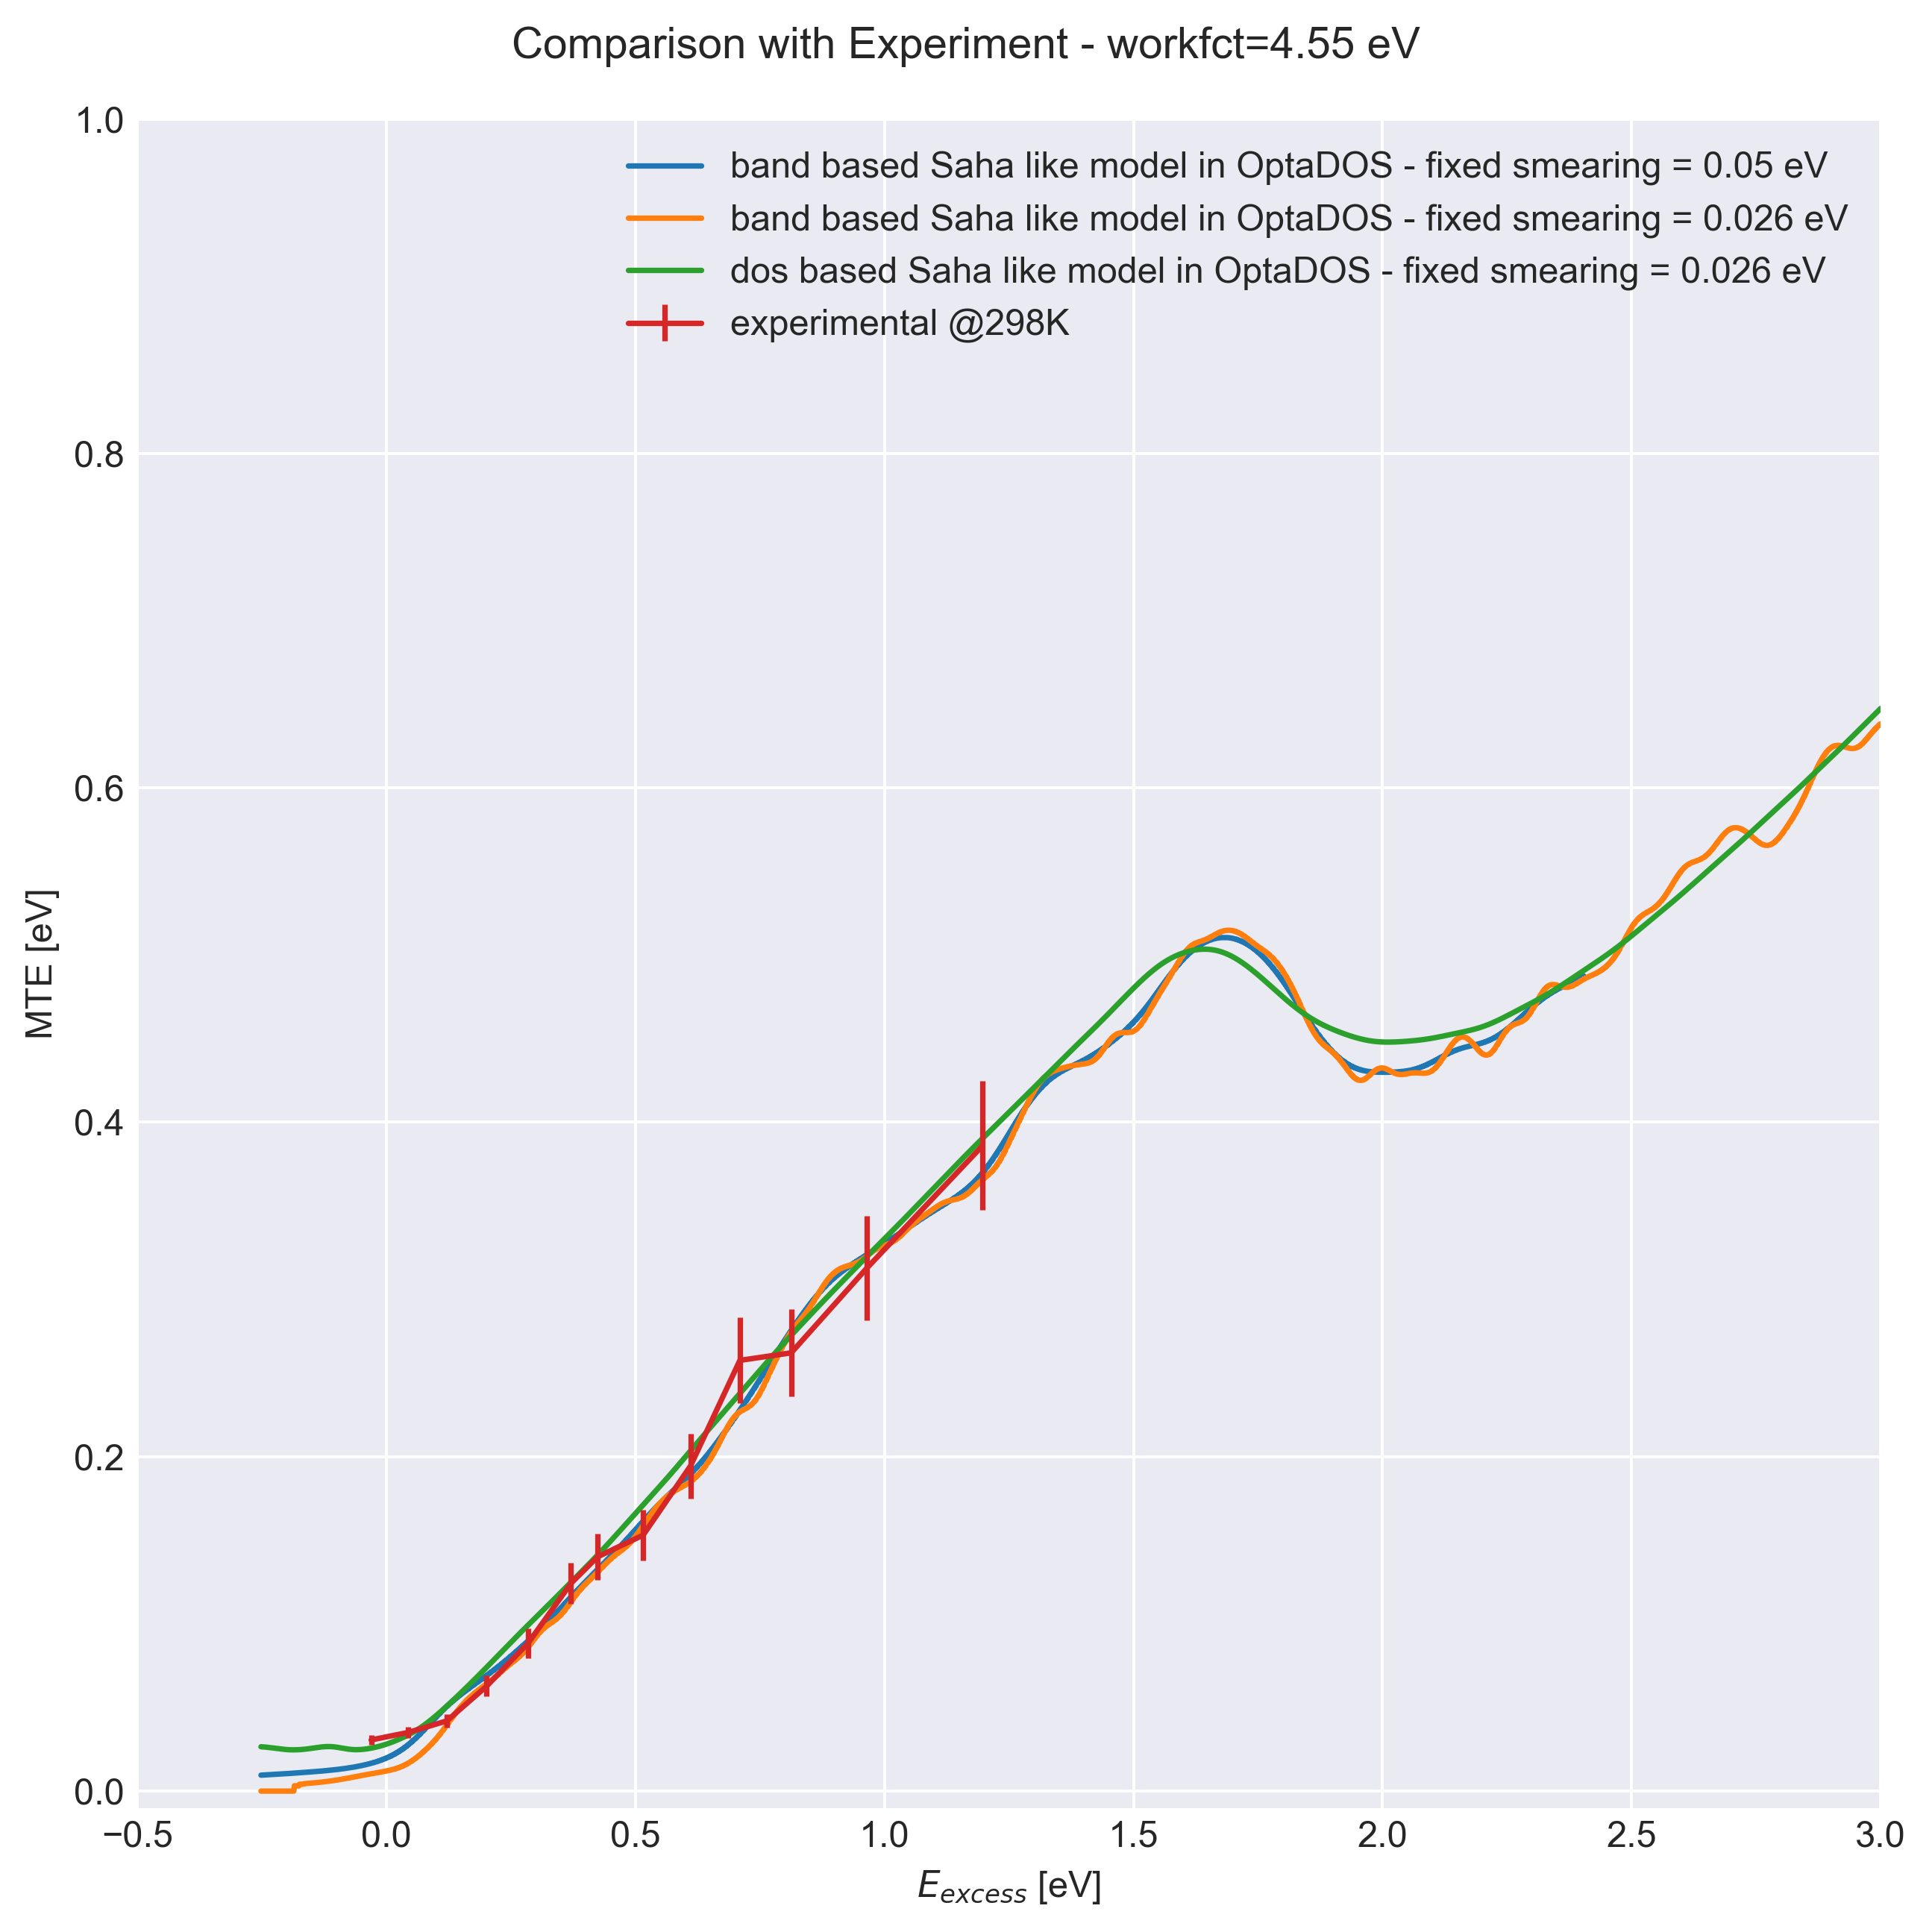

In [19]:
from scipy.integrate import quad
# import mpmath as mp
from mpmath import polylog

def ds_2(x):
    return 1/1.3*x+1.55
def ds_3(x):
    return 1/1.3*x+1.24
def ds(x):
    return 1/3*x+1.55


def fermi_dirac(x,temperature):
    k_B = 8.617333262E-5
    exponent = x/(k_B*temperature)
    if exponent > 300:
        return 0.0
    if exponent < -300:
        return 1.0
    else:
        return 1/(np.exp(exponent)+1)

integrand_1 =  lambda x,photon,workfct,T: fermi_dirac(x,T)*(1-fermi_dirac(x+photon,T))*(x+photon-workfct)**2
integrand_2 =  lambda x,photon,workfct,T: fermi_dirac(x,T)*(1-fermi_dirac(x+photon,T))*(x+photon-workfct)

integrand_a = lambda x,photon,workfct: (x+photon-workfct)**2
integrand_b = lambda x,photon,workfct: (x+photon-workfct)

polylog2 = lambda t,z: 1/t*np.log10(1-z*t)
polylog3 = lambda t,z: 1/t*np.log10(t)*np.log10(1-z*t)

def saha_model(photon,workfct,T):
    numerator = quad(integrand_1,workfct-photon,np.inf,args=(photon,workfct,T))
    # print(numerator)
    denominator = quad(integrand_2,workfct-photon,np.inf,args =(photon,workfct,T))
    return 0.5*numerator[0]/denominator[0]

def ext_ds(x,T):
    q = 1.602E-19
    k_B = 8.617333262E-5
    return k_B*T*li3(x,T)/li2(x,T)

def li2(x,T):
    k_B = 8.617333262E-5
    z = -1*np.exp(x/(k_B*T))
    return polylog(2,z)

def li3(x,T):
    k_B = 8.617333262E-5
    z = -1*np.exp(x/(k_B*T))
    return polylog(3,z)

ds = lambda x: 1/3*x
ds2 = lambda x: 1/3*x+10

workfct = 4.5519
# ds_ext_y,ds_ext_y2,saha_y,photon_x,saha_y2 = [],[],[],[],[]
# for x in [x - workfct for x in photon_energies]:
#     ds_ext_y.append(ext_ds(x,298.15))
# for photon in np.linspace(2.5,5.7,111):
#     photon_x.append(photon-workfct)
#     saha_y.append(saha_model(photon, workfct,298.15))
# saha_y2 = np.array(saha_y2)
# saha_y = np.array(saha_y)

experimental = np.genfromtxt('./structures/Experimental_data/Daresbury/CuMgO/Cu100_MTE.csv', delimiter=',',comments='#')
# print(experimental)
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,1,figsize = [7.5,7.5],dpi=350)
# ax2 = ax.twinx()

# ax.set_ylim(-.01,.7)
# ax2.plot((energy)*-1,dos,c='tab:red',label='DFT DOS')
ax.set_xlim(-.5,3)
ax.set_ylim(-.01,1)

# ax.plot(photon_energies-workfct,ds(photon_energies-workfct))
# ax.plot(photon_energies-workfct,ds_2(photon_energies-workfct),c='tab:orange',linestyle='--')
# ax.plot(photon_energies-workfct,ds_3(photon_energies-workfct),c='tab:green',linestyle='--')

# ax.plot(photon_energies-workfct,ds_ext_y,c='tab:blue',label='extended DS model')
# ax.plot(photon_energies-workfct,ds_ext_y2,c='tab:red')
# ax.plot(photon_energies-workfct,ds(photon_energies-workfct),c='tab:green')
# ax.plot(photon_energies-workfct,ds2(photon_energies-workfct),c='tab:green',linestyle='--')

# ax.scatter(photon_x,(np.array(saha_y)),c='tab:red',marker='.',label='const DOS model by Saha et al.')
# ax.plot(mtes['Cu100'][:,0]-workfct,mtes['Cu100'][:,1],label='OptaDOS calculated - adaptive smearing + full photoemission model')
# ax.plot(mtes['Cu100_normD'][:,0]-workfct,mtes['Cu100_normD'][:,1],label='OptaDOS with normed $\Delta$ func 128x128')
# ax.plot(mtes['Cu100_normD_fewK'][:,0]-workfct,mtes['Cu100_normD_fewK'][:,1],label='OptaDOS with normed $\Delta$ func 64x64')
# ax.plot(mtes['Cu100_normD_Karea'][:,0]-workfct,mtes['Cu100_normD_Karea'][:,1],c='tab:olive',alpha=.5,label='OptaDOS with normed $\Delta$ func and BZ subcell 64x64')
# ax.plot(mtes['Cu100_old'][:,0]-workfct,mtes['Cu100_old'][:,1]/1000,c='tab:blue',label='OptaDOS calculated fewer # of kpts')

ax.plot(data_a[:,0]-workfct,data_a[:,1],label = f'band based Saha like model in OptaDOS - fixed smearing = 0.05 eV')
ax.plot(data_c[:,0]-workfct,data_c[:,1],label = f'band based Saha like model in OptaDOS - fixed smearing = 0.026 eV')
ax.plot(data_c_dos[:,0]-workfct,data_c_dos[:,1],label = f'dos based Saha like model in OptaDOS - fixed smearing = 0.026 eV')
# ax.plot(data_a_dos[:,0]-workfct,data_a_dos[:,1],label = f'dos based Saha like model in OptaDOS - fixed smearing = 0.05 eV')

# ax.plot(data_b[:,0]-workfct,data_b[:,1],label = f'band based Saha like model in OptaDOS - adaptive smearing')
# ax.plot(data_b_dos[:,0]-workfct,data_b_dos[:,1],label = f'dos based Saha like model in OptaDOS - adaptive smearing')

# # ax.plot(photon_energies-workfct,np.array(final_MTE_298),c='tab:orange',label = 'DOS dependent model by Saha et al. @298K')
# # ax.plot(photon_energies-workfct,np.array(final_MTE_0_04),c='tab:red',label = 'DOS dependent model by Saha et al. @298K - $\Delta=0.04$')
# # ax.plot(photon_energies-workfct,np.array(final_MTE_0_02),c='tab:green',label = 'DOS dependent model by Saha et al. @298K - $\Delta=0.02$')
# ax.plot(photon_energies_fixed-workfct,np.array(final_mte_fixed),label = 'DOS dependent python model by Saha et al. @298K - fixed smearing 0.01')
# ax.plot(photon_energies_adaptive-workfct,np.array(final_mte_adaptive),label = 'DOS dependent python model by Saha et al. @298K - adaptive')
# ax.plot(photon_energies-workfct,np.array(final_mte_05),label = 'DOS dependent model by Saha et al. @298K - fixed DOS smearing')

ax.errorbar(experimental[:,0],experimental[:,1]/1000,yerr=experimental[:,1]/10000,label='experimental @298K')
ax.set_xlabel(r'$E_{excess}$ [eV]')
ax.set_ylabel('MTE [eV]')
ax.legend()
plt.suptitle(f'Comparison with Experiment - workfct={workfct:.2f} eV')
# ax.scatter(photon_x,(np.array(saha_y2)),c='tab:green')
plt.tight_layout()
# plt.savefig('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_comparison_saha_ds_like_fixed_0.05.png',dpi=200)
# plt.savefig('./structures/MgO_on_Cu/Interface/MgO3/Plot_DOS.png',dpi=200)


In [21]:
old_approach_QE = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_1step_old_approach.odo')).get_totals()
old_approach_MTE = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_1step_old_approach.odo')).get_mtes()
new_approach_QE = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_1step_new_approach.odo')).get_totals()
new_approach_MTE = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_1step_new_approach.odo')).get_mtes()
mp_3step_MTE = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_3step.odo')).get_mtes() 
mp_3step_QE = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_3step.odo')).get_totals()

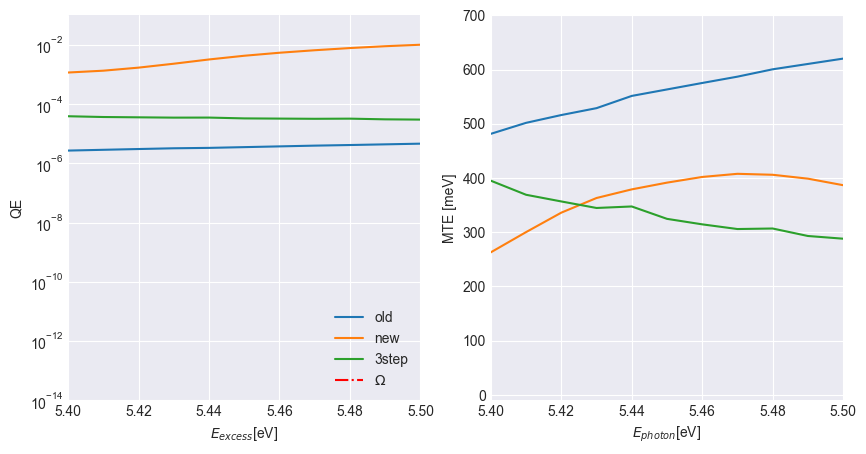

In [30]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,2,figsize=[10,5])

workfct = 4.5519

ax[0].plot(old_approach_QE[:,0],old_approach_QE[:,1],label='old')
ax[0].plot(new_approach_QE[:,0],new_approach_QE[:,1],label='new')
ax[0].plot(mp_3step_QE[:,0],mp_3step_QE[:,1],label='3step')
# ax[0].plot(old_approach_QE[:,0]-workfct,old_approach_QE[:,1],label='old')
# ax[0].plot(new_approach_QE[:,0]-workfct,new_approach_QE[:,1],label='new')
# ax[0].plot(mp_3step_QE[:,0]-workfct,mp_3step_QE[:,1],label='3step')

ax[0].set(yscale='log',ylim=[1E-14,1E-1])
ax[0].set(xlabel='$E_{excess}$[eV]',ylabel='QE')
ax[0].vlines(0,ymin=1E-15,ymax=1E0,linestyles='-.',colors='red',label='$\Omega$',zorder=1)
ax[0].legend(loc='lower right')


# ax[1].plot(old_approach_MTE[:,0]-workfct,old_approach_MTE[:,1]*1000,label='old')
# ax[1].plot(new_approach_MTE[:,0]-workfct,new_approach_MTE[:,1]*1000,label='new')
# ax[1].plot(mp_3step_MTE[:,0]-workfct,mp_3step_MTE[:,1]*1000,label='3step')
ax[1].plot(old_approach_MTE[:,0],old_approach_MTE[:,1]*1000,label='old')
ax[1].plot(new_approach_MTE[:,0],new_approach_MTE[:,1]*1000,label='new')
ax[1].plot(mp_3step_MTE[:,0],mp_3step_MTE[:,1]*1000,label='3step')

ax[1].vlines(0,ymin=-15,ymax=650,linestyles='-.',colors='red',label='$\Omega$',zorder=1)
ax[1].set(xlabel='$E_{photon}$[eV]',ylabel='MTE [meV]')
# ax[1].set(xlabel='$E_{excess}$[eV]',ylabel='MTE [meV]')
ax[1].set(ylim=[-10,700])
a = 5.4
b = 5.5
ax[0].set(xlim=[a,b])
ax[1].set(xlim=[a,b])

plt.savefig(f'./OD_debug_files/1Step_Testing/Comp_3step_1steps_QE_MTE_zoom_{a}_{b}.png',dpi=250)


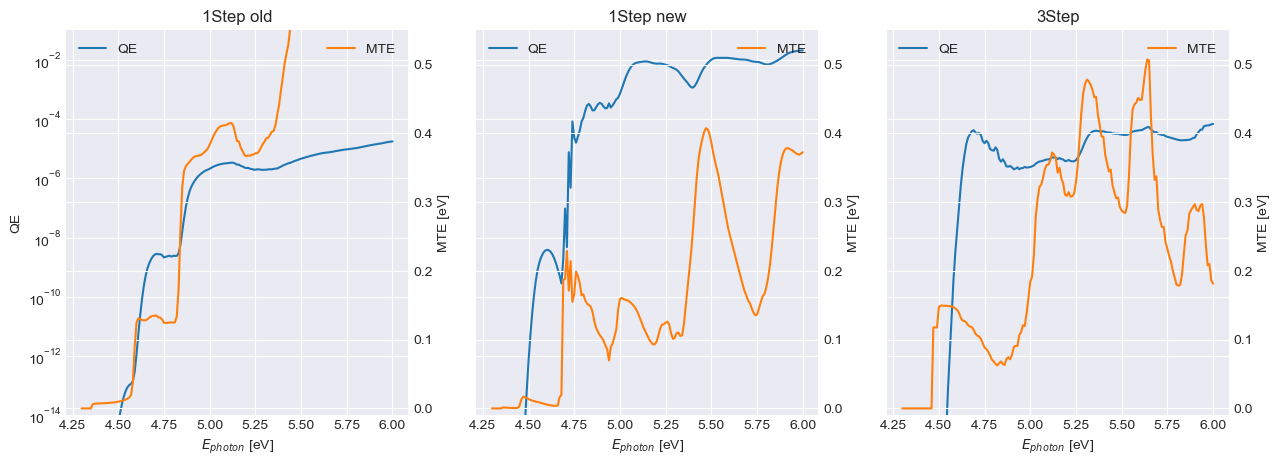

In [15]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,3,figsize=[15,5],sharey=True,sharex=True)
ax2a = ax[0].twinx()
ax[0].plot(old_approach_QE[:,0],old_approach_QE[:,1],label='QE')
# ax[0].plot(new_approach_QE[:,0],new_approach_QE[:,1],label='new')
# ax[0].plot(mp_3step_QE[:,0],mp_3step_QE[:,1],label='3step')
ax[0].set(yscale='log',ylim=[1E-14,1E-1],title='1Step old',ylabel='QE',xlabel='$E_{photon}$ [eV]')
ax[0].legend(loc ='upper left')
ax2a.plot(old_approach_MTE[:,0],old_approach_MTE[:,1],label='MTE',c='tab:orange')
ax2a.set(ylim=[-.01,.55],ylabel='MTE [eV]')
ax2a.legend(loc='upper right')

ax2b = ax[1].twinx()
ax[1].plot(new_approach_QE[:,0],new_approach_QE[:,1],label='QE')
# ax[0].plot(new_approach_QE[:,0],new_approach_QE[:,1],label='new')
# ax[0].plot(mp_3step_QE[:,0],mp_3step_QE[:,1],label='3step')
ax[1].set(yscale='log',title='1Step new',xlabel='$E_{photon}$ [eV]')
ax[1].legend(loc='upper left')
ax2b.plot(new_approach_MTE[:,0],new_approach_MTE[:,1],label='MTE',c='tab:orange')
ax2b.set(ylim=[-.01,.55],ylabel='MTE [eV]')
ax2b.legend(loc='upper right')

ax2c = ax[2].twinx()
ax[2].plot(mp_3step_QE[:,0],mp_3step_QE[:,1],label='QE')
# ax[0].plot(new_approach_QE[:,0],new_approach_QE[:,1],label='new')
# ax[0].plot(mp_3step_QE[:,0],mp_3step_QE[:,1],label='3step')
ax[2].set(yscale='log',title = '3Step',xlabel='$E_{photon}$ [eV]')
ax[2].legend(loc='upper left')
ax2c.plot(mp_3step_MTE[:,0],mp_3step_MTE[:,1],label='MTE',c='tab:orange')
ax2c.set(ylim=[-.01,.55],ylabel='MTE [eV]')
ax2c.legend(loc='upper right')

### MTE modelling - sources: 
1.	E. R. Antoniuk, Y. Yue, Y. Zhou, P. Schindler, W. A. Schroeder, B. Dunham, P. Pianetta, T. Vecchione and E. J. Reed, Physical Review B, 2020, 101, 235447.
2.	P. Saha, O. Chubenko, J. Kevin Nangoi, T. Arias, E. Montgomery, S. Poddar, H. A. Padmore and S. Karkare, Journal of Applied Physics, 2023, 133.

In [3]:
def fermi_dirac(x,temperature):
    k_B = 8.617333262E-5
    exponent = x/(k_B*temperature)
    if exponent > 250:
        return 0.0
    if exponent < -250:
        return 1.0
    else:
        return 1/(np.exp(exponent)+1)

def delta_func(sigma, initial, final, Ephoton):
    x = final - initial - Ephoton
    exponent = -1*x/sigma
    if exponent > 250 or exponent < -250:
        return 0
    else:
        delta = 1/sigma * (np.exp(-1*x/sigma))/((1+np.exp(-1*x/sigma))**2)
        return delta

def occupancy_factor(initial, final):
    return initial*(1-final)

temperature = 298.15
workfct = 4.5519
photon_energies = np.round(np.array([float(x) for x  in np.linspace(4.3,8.3,81)]),3)
sigma = 0.04

# Load DOS data:
# dos_dat = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/MgO3.adaptive.dat')[:,:-1]
dos_dat = np.genfromtxt('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_64x64.fixed_0.05.dat')[:,:-1]
energy = np.round(dos_dat[:,0],3)
dos = dos_dat[:,1]
delta_E = round(energy[1]-energy[0],3)
fd = np.zeros(energy.shape)
# Create FD data
for index, e in enumerate(energy):
    fd[index] = fermi_dirac(e, temperature)


final_MTE,numerators,denominators = [],[],[]
for Ephoton in photon_energies:
    numerator = 0
    denominator = 0
    diff = 1E6
    # Find the index of the energy bin with the energy closes to E_vac - hbar*omega - minimal emitting energy
    for index,temp in enumerate(energy):
        if (abs(temp - round(workfct - Ephoton,3)) < diff):
            diff = abs(temp - (workfct - Ephoton))
            current_E_index = index
    # print(energy[current_E_index])
    delta_index_photon = int(Ephoton/delta_E)
    delta_w = int(workfct/delta_E)
    # print(delta_index_photon)
    # print(current_E_index)
    # print(fd[current_E_index])
    # print(len(energy))
    # print(delta_E)
    # delta_debug = np.zeros(energy.shape)
    # for index,element in enumerate(energy):
    #     delta_debug[index] = delta_func(sigma, energy[current_E_index],element, Ephoton)
    
    # Go from minimal energy (i.e. workfct - photon) to basically unoccupied bands or maximum_dos_energy - hbar*omega
    while fd[current_E_index] > 1E-30 or current_E_index+delta_index_photon < len(energy)-100:
        initial_Energy = energy[current_E_index]
        fd_initial = fd[current_E_index]
        dos_initial = dos[current_E_index]
        
        fd_final = fd[current_E_index+delta_index_photon]
        dos_final = dos[current_E_index+delta_index_photon]
        # Calculate the excess energy as E + hbar*omega - workfct <-(i.e E_vacuum with E_F=0)
        E_excess = energy[current_E_index+delta_index_photon]-workfct

        numerator += dos_initial*fd_initial*dos_final*(1-fd_final)*E_excess**2
        denominator += dos_initial*fd_initial*dos_final*(1-fd_final)*E_excess
        # print(dos_initial, fd_initial, dos_final, (1-fd_final), E_excess)
        # print (numerator, denominator,0.5*numerator/denominator)
        # for i in range(-100,100,1):
        #     fd_final = fd[current_E_index+delta_index_photon+i]
        #     dos_final = dos[current_E_index+delta_index_photon+i]
        #     final_Energy = energy[current_E_index+delta_index_photon+i]
        #     E_excess = final_Energy-workfct
        #     delta = delta_func(sigma,initial_Energy,final_Energy,Ephoton)
        #     numerator += delta*dos_initial*fd_initial*dos_final*(1-fd_final)*E_excess**2
        #     denominator += delta*dos_initial*fd_initial*dos_final*(1-fd_final)*E_excess
        current_E_index += 1
        
    if abs(denominator) > 0:
        numerators.append(numerator)
        denominators.append(denominator)
        final_MTE.append(0.5*numerator/denominator)
    else:
        final_MTE.append(0)
    
    print(Ephoton)

4.3
4.35
4.4
4.45
4.5
4.55
4.6
4.65
4.7
4.75
4.8
4.85
4.9
4.95
5.0
5.05
5.1
5.15
5.2
5.25
5.3
5.35
5.4
5.45
5.5
5.55
5.6
5.65
5.7
5.75
5.8
5.85
5.9
5.95
6.0
6.05
6.1
6.15
6.2
6.25
6.3
6.35
6.4
6.45
6.5
6.55
6.6
6.65
6.7
6.75
6.8
6.85
6.9
6.95
7.0
7.05
7.1
7.15
7.2
7.25
7.3
7.35
7.4
7.45
7.5
7.55
7.6
7.65
7.7
7.75
7.8
7.85
7.9
7.95
8.0
8.05
8.1
8.15
8.2
8.25
8.3


In [6]:
view(read('./structures/MgO_on_Cu/Interface/MgO2/MgO2_geom_opt_2.xyz'))

<Popen: returncode: None args: ['c:\\Users\\fcm19\\Miniconda3\\envs\\matchem...>

In [7]:
final_MTE_0_04 = final_MTE

In [7]:
od_data = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_no_final_fd.odo'))
# od_data_2 = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp.odo'))
od_data_2 = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_512x512_fixed_0.05_3step.odo'))
od_data_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_5_23_300K.odo'))
od_data_4 = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_tight_128x128_normed_delta_function.odo'))#
od_data_5 = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_tight_64x64_normed_delta_function.odo'))
data_a = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/ds_like_model_comparisons/Cu100_mp_128_fixed_0.026_unnormed_delta_final_Eexc.odo'))
data_b = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/ds_like_model_comparisons/Cu100_mp_128_adaptive_unnormed_delta_final_Eexc.odo'))
data_c = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_128x128_ds_like_fixed_0.01_jdos_0.001.odo'))
mtes = extract_mte([od_data,od_data_2,od_data_3,od_data_4,od_data_5,data_a,data_b,data_c],['Cu100','512_3step',"Cu100_old","Cu100_normD",'Cu100_normD_fewK','128','128_adap','128_0.001'])

In [8]:
file1 = Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/ds_like_model_comparisons/Cu100_5_23_adaptive_0.001.odo')
file2 = Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_fixed_0.05_step_0.001.odo')
file3 = Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_fixed_0.026_step_0.001.odo')

mte_adaptive_dos = OptaDOSOutput(file2).get_dos_mtes()
mte_adaptive = OptaDOSOutput(file2).get_mtes()
mte_dos_fixed = OptaDOSOutput(file3).get_dos_mtes()
mte_fixed = OptaDOSOutput(file3).get_mtes()


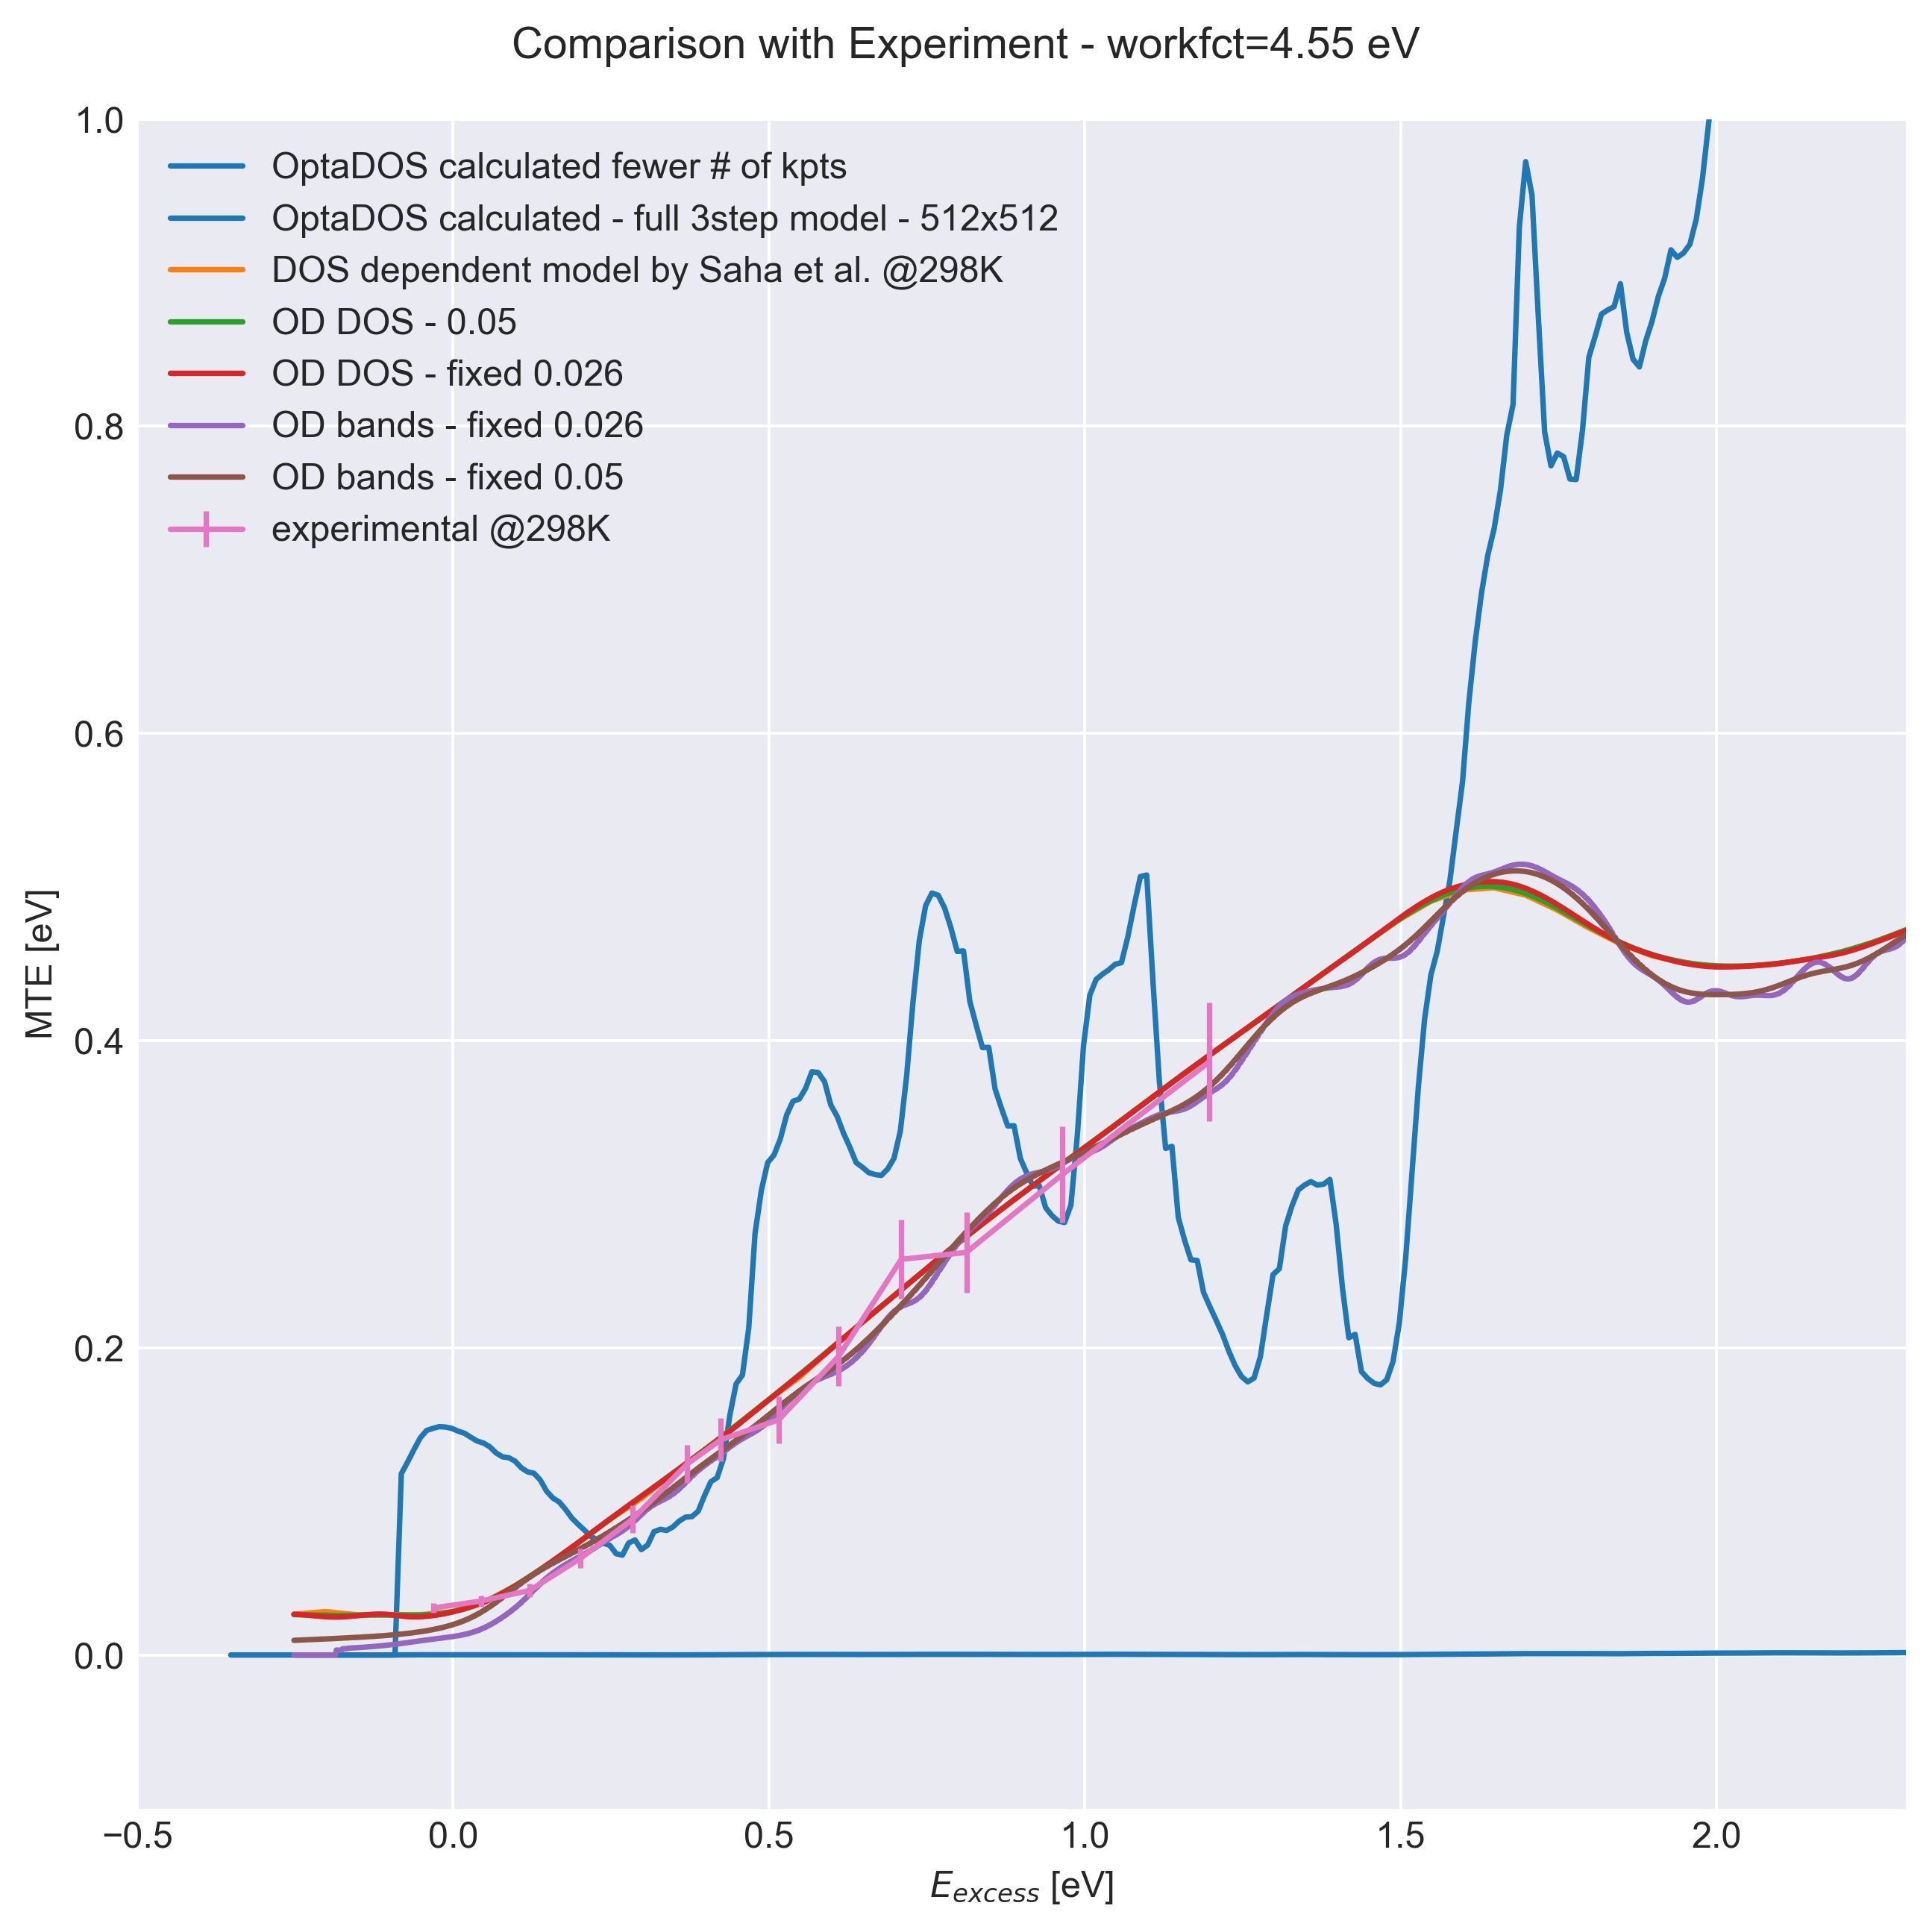

In [22]:
from scipy.integrate import quad
# import mpmath as mp
from mpmath import polylog

def ds_2(x):
    return 1/1.3*x+1.55
def ds_3(x):
    return 1/1.3*x+1.24
def ds(x):
    return 1/3*x+1.55


def fermi_dirac(x,temperature):
    k_B = 8.617333262E-5
    exponent = x/(k_B*temperature)
    if exponent > 300:
        return 0.0
    if exponent < -300:
        return 1.0
    else:
        return 1/(np.exp(exponent)+1)

integrand_1 =  lambda x,photon,workfct,T: fermi_dirac(x,T)*(1-fermi_dirac(x+photon,T))*(x+photon-workfct)**2
integrand_2 =  lambda x,photon,workfct,T: fermi_dirac(x,T)*(1-fermi_dirac(x+photon,T))*(x+photon-workfct)

integrand_a = lambda x,photon,workfct: (x+photon-workfct)**2
integrand_b = lambda x,photon,workfct: (x+photon-workfct)

polylog2 = lambda t,z: 1/t*np.log10(1-z*t)
polylog3 = lambda t,z: 1/t*np.log10(t)*np.log10(1-z*t)

def saha_model(photon,workfct,T):
    numerator = quad(integrand_1,workfct-photon,np.inf,args=(photon,workfct,T))
    # print(numerator)
    denominator = quad(integrand_2,workfct-photon,np.inf,args =(photon,workfct,T))
    return 0.5*numerator[0]/denominator[0]

def ext_ds(x,T):
    q = 1.602E-19
    k_B = 8.617333262E-5
    return k_B*T*li3(x,T)/li2(x,T)

def li2(x,T):
    k_B = 8.617333262E-5
    z = -1*np.exp(x/(k_B*T))
    return polylog(2,z)

def li3(x,T):
    k_B = 8.617333262E-5
    z = -1*np.exp(x/(k_B*T))
    return polylog(3,z)

ds = lambda x: 1/3*x
ds2 = lambda x: 1/3*x+10

workfct = 4.5519
ds_ext_y,ds_ext_y2,saha_y,photon_x,saha_y2 = [],[],[],[],[]
for x in [x - workfct for x in photon_energies]:
    ds_ext_y.append(ext_ds(x,298.15))
for photon in np.linspace(2.5,5.7,111):
    photon_x.append(photon-workfct)
    saha_y.append(saha_model(photon, workfct,298.15))
saha_y2 = np.array(saha_y2)
saha_y = np.array(saha_y)

experimental = np.genfromtxt('./structures/Experimental_data/Daresbury/CuMgO/Cu100_MTE.csv', delimiter=',',comments='#')
# print(experimental)
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,1,figsize = [7.5,7.5],dpi=350)
# ax2 = ax.twinx()

ax.set_xlim(-.5,2.3)
ax.set_ylim(-.1,1)
# ax2.plot(energy*-1,dos*5000,c='tab:red',label='DFT DOS')
# ax2.set_ylim(-2,650)

# ax.plot(photon_energies-workfct,ds(photon_energies-workfct))
# ax.plot(photon_energies-workfct,ds_2(photon_energies-workfct),c='tab:orange',linestyle='--')
# ax.plot(photon_energies-workfct,ds_3(photon_energies-workfct),c='tab:green',linestyle='--')

# ax.plot(photon_energies-workfct,ds_ext_y,c='tab:blue',label='extended DS model')
# ax.plot(photon_energies-workfct,ds_ext_y2,c='tab:red')
# ax.plot(photon_energies-workfct,ds(photon_energies-workfct),c='tab:green')
# ax.plot(photon_energies-workfct,ds2(photon_energies-workfct),c='tab:green',linestyle='--')

# ax.scatter(photon_x,(np.array(saha_y)),c='tab:red',marker='.',label='const DOS model by Saha et al.')
# ax.plot(mtes['Cu100'][:,0]-workfct,mtes['Cu100'][:,1],label='OptaDOS calculated - adaptive smearing + full photoemission model')
# ax.plot(mtes['Cu100_normD'][:,0]-workfct,mtes['Cu100_normD'][:,1],label='OptaDOS with normed $\Delta$ func 128x128')
# ax.plot(mtes['Cu100_normD_fewK'][:,0]-workfct,mtes['Cu100_normD_fewK'][:,1],label='OptaDOS with normed $\Delta$ func 64x64')
# ax.plot(mtes['Cu100_normD_Karea'][:,0]-workfct,mtes['Cu100_normD_Karea'][:,1],c='tab:olive',alpha=.5,label='OptaDOS with normed $\Delta$ func and BZ subcell 64x64')
# ax.plot(mtes['Cu100_old'][:,0]-workfct,mtes['Cu100_old'][:,1]/1000,c='tab:blue',label='OptaDOS calculated fewer # of kpts')
ax.plot(mtes['512_3step'][:,0]-workfct,mtes['512_3step'][:,1],label='OptaDOS calculated - full 3step model - 512x512')
# ax.plot(mtes['128_0.001'][:,0]-workfct,mtes['128_0.001'][:,1],label = f'Saha like Model in OptaDOS - 128x128 - fixed smearing = 0.01 eV')

# ax.plot(photon_energies-workfct,np.array(final_MTE_298),c='tab:orange',label = 'DOS dependent model by Saha et al. @298K')
# ax.plot(photon_energies-workfct,np.array(final_MTE_0_04),c='tab:red',label = 'DOS dependent model by Saha et al. @298K - $\Delta=0.04$')
# ax.plot(photon_energies-workfct,np.array(final_MTE_0_02),c='tab:green',label = 'DOS dependent model by Saha et al. @298K - $\Delta=0.02$')
ax.plot(photon_energies-workfct,np.array(final_MTE),label = 'DOS dependent model by Saha et al. @298K')
ax.plot(mte_adaptive_dos[:,0]-workfct,mte_adaptive_dos[:,1],label = 'OD DOS - 0.05')
ax.plot(mte_dos_fixed[:,0]-workfct,mte_dos_fixed[:,1],label = 'OD DOS - fixed 0.026')
ax.plot(mte_fixed[:,0]-workfct,mte_fixed[:,1],label='OD bands - fixed 0.026')
ax.plot(mte_adaptive[:,0]-workfct,mte_adaptive[:,1],label='OD bands - fixed 0.05')


ax.errorbar(experimental[:,0],experimental[:,1]/1000,yerr=experimental[:,1]/10000,label='experimental @298K')
ax.set_xlabel(r'$E_{excess}$ [eV]')
ax.set_ylabel('MTE [eV]')
plt.legend()
plt.suptitle(f'Comparison with Experiment - workfct={workfct:.2f} eV')
# ax.scatter(photon_x,(np.array(saha_y2)),c='tab:green')
plt.tight_layout()
plt.savefig('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_comparison_saha_og_512_comp.png',dpi=200)
# print(saha_y-saha_y2)

In [13]:
print(mte_adaptive[:,1])

[0.00953901 0.00955649 0.00955649 ... 0.48725647 0.48743013 0.48743013]


In [1]:
experimental = np.genfromtxt('./structures/Experimental_data/Daresbury/CuMgO/Cu100_MTE.csv', delimiter=',',comments='#')
# print(experimental)
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,1,figsize = [7.5,7.5],dpi=350)
# ax2 = ax.twinx()

ax.set_xlim(-.5,2.3)
# ax.set_ylim(-.1,1)
# ax2.plot(energy*-1,dos*5000,c='tab:red',label='DFT DOS')
# ax2.set_ylim(-2,650)

# ax.plot(photon_energies-workfct,ds(photon_energies-workfct))
# ax.plot(photon_energies-workfct,ds_2(photon_energies-workfct),c='tab:orange',linestyle='--')
# ax.plot(photon_energies-workfct,ds_3(photon_energies-workfct),c='tab:green',linestyle='--')

# ax.plot(photon_energies-workfct,ds_ext_y,c='tab:blue',label='extended DS model')
# ax.plot(photon_energies-workfct,ds_ext_y2,c='tab:red')
# ax.plot(photon_energies-workfct,ds(photon_energies-workfct),c='tab:green')
# ax.plot(photon_energies-workfct,ds2(photon_energies-workfct),c='tab:green',linestyle='--')

# ax.scatter(photon_x,(np.array(saha_y)),c='tab:red',marker='.',label='const DOS model by Saha et al.')
# ax.plot(mtes['Cu100'][:,0]-workfct,mtes['Cu100'][:,1],label='OptaDOS calculated - adaptive smearing + full photoemission model')
# ax.plot(mtes['Cu100_normD'][:,0]-workfct,mtes['Cu100_normD'][:,1],label='OptaDOS with normed $\Delta$ func 128x128')
# ax.plot(mtes['Cu100_normD_fewK'][:,0]-workfct,mtes['Cu100_normD_fewK'][:,1],label='OptaDOS with normed $\Delta$ func 64x64')
# ax.plot(mtes['Cu100_normD_Karea'][:,0]-workfct,mtes['Cu100_normD_Karea'][:,1],c='tab:olive',alpha=.5,label='OptaDOS with normed $\Delta$ func and BZ subcell 64x64')
# ax.plot(mtes['Cu100_old'][:,0]-workfct,mtes['Cu100_old'][:,1]/1000,c='tab:blue',label='OptaDOS calculated fewer # of kpts')
ax.plot(mtes['512_3step'][:,0]-workfct,MTE_2_intrinsic_emittance(mtes['512_3step'][:,1]*1000),label='OptaDOS calculated - full 3step model - 512x512')
# ax.plot(mtes['128_0.001'][:,0]-workfct,MTE_2_intrinsic_emittance(mtes['128_0.001'][:,1]*1000),label = f'Saha like Model in OptaDOS - 128x128 - fixed smearing = 0.01 eV')
ax.plot(mtes['128'][:,0]-workfct,MTE_2_intrinsic_emittance(mtes['128'][:,1]*1000),label = f'Saha like Model in OptaDOS - 128x128 - fixed smearing = 0.01 eV')


# ax.plot(photon_energies-workfct,np.array(final_MTE_298),c='tab:orange',label = 'DOS dependent model by Saha et al. @298K')
# ax.plot(photon_energies-workfct,np.array(final_MTE_0_04),c='tab:red',label = 'DOS dependent model by Saha et al. @298K - $\Delta=0.04$')
# ax.plot(photon_energies-workfct,np.array(final_MTE_0_02),c='tab:green',label = 'DOS dependent model by Saha et al. @298K - $\Delta=0.02$')
# ax.plot(mtes[])
# ax.plot(photon_energies-workfct,np.array(final_MTE),label = 'DOS dependent model by Saha et al. @298K')
ax.plot(mte_adaptive_dos[:,0]-workfct,MTE_2_intrinsic_emittance(mte_adaptive_dos[:,1]*1000),label = 'OD DOS - 0.05')
ax.plot(mte_dos_fixed[:,0]-workfct,MTE_2_intrinsic_emittance(mte_dos_fixed[:,1]*1000),label = 'OD DOS - fixed 0.026')
ax.plot(mte_fixed[:,0]-workfct,MTE_2_intrinsic_emittance(mte_fixed[:,1]*1000),label='OD bands - fixed 0.026')
ax.plot(mte_adaptive[:,0]-workfct,MTE_2_intrinsic_emittance(mte_adaptive[:,1]*1000),label='OD bands - fixed 0.05')


ax.errorbar(experimental[:,0],MTE_2_intrinsic_emittance(experimental[:,1]),yerr=experimental[:,1]/10000,label='experimental @298K')
ax.set_xlabel(r'$E_{excess}$ [eV]')
ax.set_ylabel('MTE [eV]')
plt.legend()
plt.suptitle(f'Comparison with Experiment - workfct={workfct:.2f} eV')
# ax.scatter(photon_x,(np.array(saha_y2)),c='tab:green')
plt.tight_layout()
# plt.savefig('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_comparison_saha_og_512_comp.png',dpi=200)
# print(saha_y-saha_y2)

NameError: name 'np' is not defined

In [ ]:
plt.plot(energy,delta_debug)
plt.vlines(energy[current_E_index],ymin=-.1,ymax =1.3, colors='r', linestyles='--')
plt.vlines(energy[current_E_index]+Ephoton,ymin=-.1,ymax =1.3, colors='g', linestyles='--')
plt.vlines(0,ymin=-.1,ymax =1.3, colors='tab:blue', linestyles='--')
plt.xlim(-5,5)
